<a href="https://colab.research.google.com/github/Sumin0411/SKTFlyAI/blob/main/05_nn_multi_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [4]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [5]:
samples = np.random.randint(60000, size=16)
samples

array([10627, 53856, 37702, 23121, 17843, 47189,  9386, 34289, 54801,
       59799, 14839, 32306,  4051, 30780,  9963, 56208])

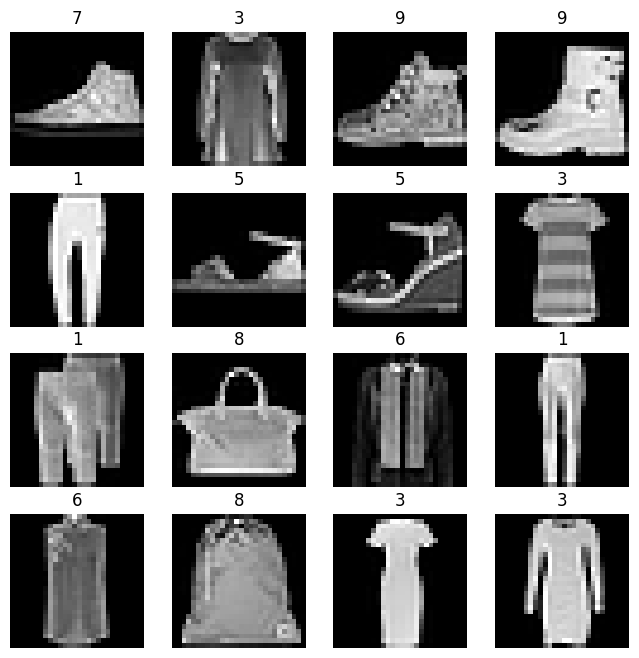

In [6]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(4, 4, 1+i)
  plt.imshow(X_train[idx], cmap='gray')
  plt.axis('off')
  plt.title(y_train[idx])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [8]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

In [9]:
np.max(X_train_s), np.min(X_train_s)

(1.0, 0.0)

In [10]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

y_train_o[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [11]:
X_train_s = X_train_s.reshape(-1, 28*28)
X_val_s = X_val_s.reshape(-1, 28*28)

In [12]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=(28*28, )),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
EPOCHS = 15
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1
)

Epoch 1/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2562 - accuracy: 0.9048 - val_loss: 0.3311 - val_accuracy: 0.8831
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2502 - accuracy: 0.9051 - val_loss: 0.3270 - val_accuracy: 0.8858
Epoch 3/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2406 - accuracy: 0.9100 - val_loss: 0.3444 - val_accuracy: 0.8816
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2344 - accuracy: 0.9120 - val_loss: 0.3577 - val_accuracy: 0.8746
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2280 - accuracy: 0.9135 - val_loss: 0.3345 - val_accuracy: 0.8856
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2246 - accuracy: 0.9156 - val_loss: 0.3406 - val_accuracy: 0.8855
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2171 - accuracy: 0.9172 - val_loss: 0.3512 - val_accuracy:

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

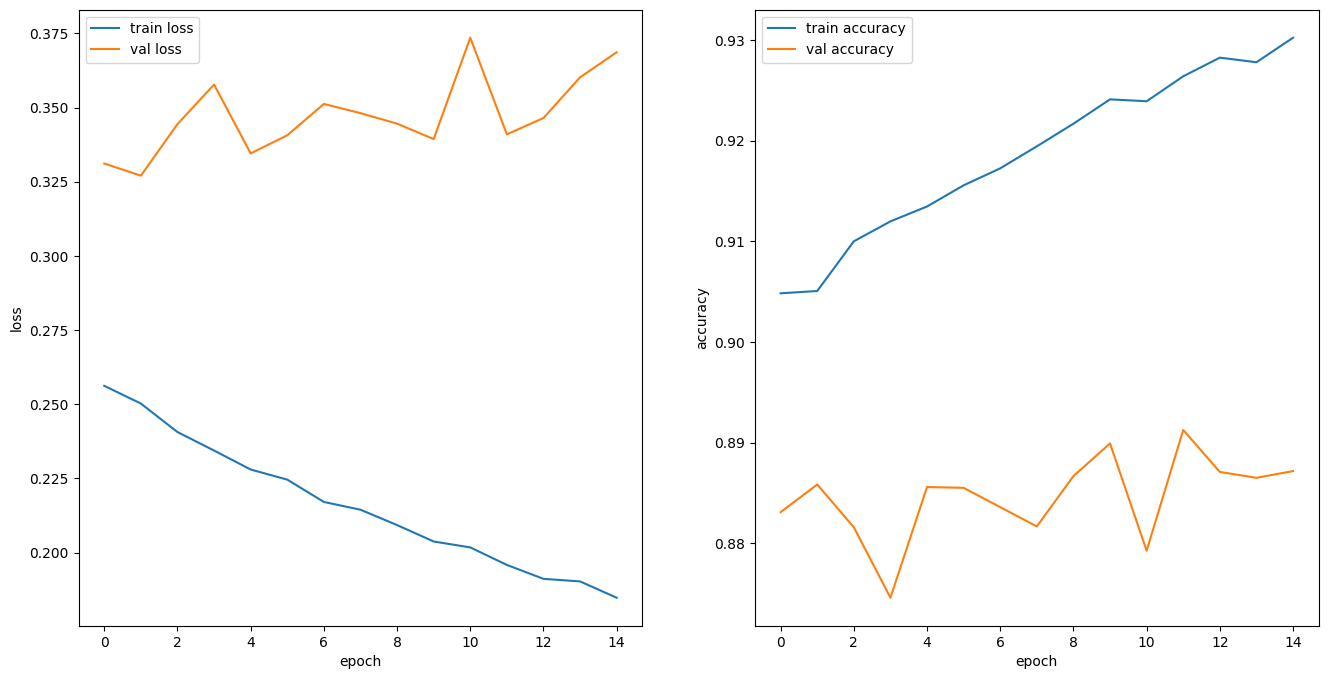

In [20]:
plot_history(history)